In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
plt.style.use('ggplot')

In [356]:
#定义我自己的k均值聚类
def my_k_means(src, center, itera = 10, rseed = 2000): 
    #形参src为输入向量，形状为 N * d , center为聚类中心的个数， itera为迭代次数， rseed为设置随机数种子
    rng = np.random.RandomState(rseed)
    i = rng.permutation(src.shape[0])[:center] 
    centers = src[i] #从随机的样本中选取center个聚类中心
    new_centers = centers.copy()
    for i in range(itera): #开始迭代
        print(i) #便于观察迭代到多少次
        calc = np.array([(sum((src[i]-centers[j])**2)) for i in range(src.shape[0]) for j in range(center)]) 
        #这里计算每一个样本与center个聚类中心的欧式距离，结果保存在一个 N * center 的一维numpy数组里
        calc = calc.reshape(src.shape[0], center) #这里reshape成二维便于计算
        calc_index1,calc_index2 = np.where(calc == (calc.min(axis = 1)).reshape(-1,1))
        calc_index = np.array(list(dict(map(lambda a,b:(a,b),calc_index1,calc_index2)).values())) 
        #提取每一个样本距离center个聚类中心最近的索引，保存在calc_index里，形状为 N * 1 的二维数组
        for j in range(center): #这个循环用于更新聚类中心
            new_centers[j] = src[calc_index == j].mean(axis=0) #将离每个聚类中心最近的样本提取出来，计算均值，结果就是新的聚类中心
        if np.all(centers == new_centers): #判定如果所有的聚类中心未发生变动，则跳出循环
            break
        centers = new_centers.copy()
    return centers

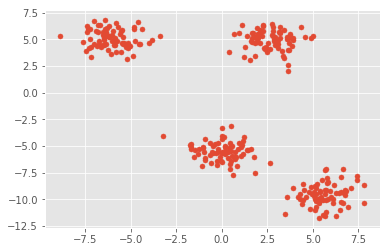

In [325]:
#稍微测试一下my_k_means函数，选取如下图所示的测试样本，x y坐标为其特征
X, y_true = make_blobs(n_samples=300, centers = 4, cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=25)

In [330]:
X.shape #一共300个样本，2个特征

(300, 2)

In [335]:
centers = my_k_means(X, 4) #开始聚类，4个聚类中心

0
(300,)
1
(300,)


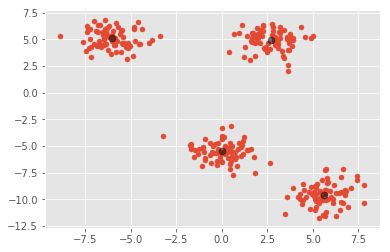

In [336]:
#二维特征聚类效果还行，可从下图看出
plt.scatter(X[:, 0], X[:, 1], s=25)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 50, alpha = 0.5)

In [295]:
#再测试一下高维特征的聚类效果，聚类手写数字，从 sklearn.datasets 中导入 1797 个样本，图像的每个像素作为特征，共64个特征
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [414]:
centers = my_k_means(digits.data, 10) #聚10个聚类中心

0
1
2
3
4
5
6
7
8
9


In [378]:
type(digits.data),digits.data.dtype

(numpy.ndarray, dtype('float64'))

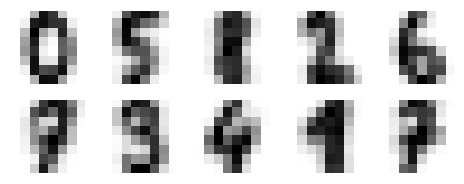

In [415]:
#效果中等，有几个数字不易区分
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = centers.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [383]:
# 对每张图片裁取 300 张 11*11 的小图片，每个大类取 100 张大图片 ，三个大类共计 90000 张小图片
# 对每个大类聚 300 个聚类中心， 共 900 个聚类中心
texture_bubbly = np.zeros((30000,11,11),dtype=np.uint8) 
texture_stratified = np.zeros_like(texture_bubbly)
texture_veined = np.zeros_like(texture_bubbly)
texture_bubbly_vector = np.zeros((30000,11*11))
texture_stratified_vector = np.zeros_like(texture_bubbly_vector)
texture_veined_vector = np.zeros_like(texture_bubbly_vector)
texture_bubbly_dir = 'texture\\bubbly'
texture_stratified_dir = 'texture\\stratified'
texture_veined_dir = 'texture\\veined'

In [384]:
imgs_num = 100
imgs_size = 11
imgs_count = 0
for i in range(200):
    if imgs_count == 30000:
        break
    img = cv2.imread(texture_bubbly_dir+'\\bubbly_%04d.jpg'%(i),0)
    if not str(type(img)) == "<class 'NoneType'>":
        for j in range(300):
            if imgs_count == 30000:
                break
            y = np.random.randint(img.shape[0]+1-imgs_size)
            x = np.random.randint(img.shape[1]+1-imgs_size)
            texture_bubbly[imgs_count] = img[y:y+imgs_size, x:x+imgs_size]
            imgs_count += 1
    else:
        print('import bubbly_%04d.jpg failed'%(i))

import bubbly_0000.jpg failed
import bubbly_0001.jpg failed
import bubbly_0002.jpg failed
import bubbly_0003.jpg failed
import bubbly_0004.jpg failed
import bubbly_0005.jpg failed
import bubbly_0006.jpg failed
import bubbly_0007.jpg failed
import bubbly_0008.jpg failed
import bubbly_0009.jpg failed
import bubbly_0010.jpg failed
import bubbly_0011.jpg failed
import bubbly_0012.jpg failed
import bubbly_0013.jpg failed
import bubbly_0014.jpg failed
import bubbly_0015.jpg failed
import bubbly_0016.jpg failed
import bubbly_0017.jpg failed
import bubbly_0018.jpg failed
import bubbly_0019.jpg failed
import bubbly_0020.jpg failed
import bubbly_0021.jpg failed
import bubbly_0022.jpg failed
import bubbly_0023.jpg failed
import bubbly_0024.jpg failed
import bubbly_0025.jpg failed
import bubbly_0026.jpg failed
import bubbly_0027.jpg failed
import bubbly_0028.jpg failed
import bubbly_0029.jpg failed
import bubbly_0030.jpg failed
import bubbly_0031.jpg failed
import bubbly_0032.jpg failed
import bub

In [400]:
imgs_num = 100
imgs_size = 11
imgs_count = 0
for i in range(200):
    if imgs_count == 30000:
        break
    img = cv2.imread(texture_stratified_dir+'\\stratified_%04d.jpg'%(i),0)
    if not str(type(img)) == "<class 'NoneType'>":
        for j in range(300):
            if imgs_count == 30000:
                break
            y = np.random.randint(img.shape[0]+1-imgs_size)
            x = np.random.randint(img.shape[1]+1-imgs_size)
            texture_stratified[imgs_count] = img[y:y+imgs_size, x:x+imgs_size]
            imgs_count += 1
    else:
        print('import stratified_%04d.jpg failed'%(i))

import stratified_0000.jpg failed
import stratified_0001.jpg failed
import stratified_0002.jpg failed
import stratified_0003.jpg failed
import stratified_0004.jpg failed
import stratified_0005.jpg failed
import stratified_0006.jpg failed
import stratified_0007.jpg failed
import stratified_0008.jpg failed
import stratified_0009.jpg failed
import stratified_0010.jpg failed
import stratified_0011.jpg failed
import stratified_0012.jpg failed
import stratified_0013.jpg failed
import stratified_0014.jpg failed
import stratified_0015.jpg failed
import stratified_0016.jpg failed
import stratified_0017.jpg failed
import stratified_0018.jpg failed
import stratified_0019.jpg failed
import stratified_0020.jpg failed
import stratified_0021.jpg failed
import stratified_0022.jpg failed
import stratified_0023.jpg failed
import stratified_0024.jpg failed
import stratified_0025.jpg failed
import stratified_0026.jpg failed
import stratified_0028.jpg failed
import stratified_0029.jpg failed
import stratif

In [395]:
imgs_num = 100
imgs_size = 11
imgs_count = 0
for i in range(200):
    if imgs_count == 30000:
        break
    img = cv2.imread(texture_veined_dir+'\\veined_%04d.jpg'%(i),0)
    if not str(type(img)) == "<class 'NoneType'>":
        for j in range(300):
            if imgs_count == 30000:
                break
            y = np.random.randint(img.shape[0]+1-imgs_size)
            x = np.random.randint(img.shape[1]+1-imgs_size)
            texture_veined[imgs_count] = img[y:y+imgs_size, x:x+imgs_size]
            imgs_count += 1
    else:
        print('import veined_%04d.jpg failed'%(i))

import veined_0000.jpg failed
import veined_0002.jpg failed
import veined_0003.jpg failed
import veined_0004.jpg failed
import veined_0005.jpg failed
import veined_0006.jpg failed
import veined_0007.jpg failed
import veined_0008.jpg failed
import veined_0009.jpg failed
import veined_0010.jpg failed
import veined_0011.jpg failed
import veined_0012.jpg failed
import veined_0013.jpg failed
import veined_0014.jpg failed
import veined_0015.jpg failed
import veined_0016.jpg failed
import veined_0017.jpg failed
import veined_0018.jpg failed
import veined_0019.jpg failed
import veined_0020.jpg failed
import veined_0021.jpg failed
import veined_0022.jpg failed
import veined_0023.jpg failed
import veined_0024.jpg failed
import veined_0025.jpg failed
import veined_0026.jpg failed
import veined_0027.jpg failed
import veined_0028.jpg failed
import veined_0029.jpg failed
import veined_0030.jpg failed
import veined_0031.jpg failed
import veined_0032.jpg failed
import veined_0033.jpg failed
import vei

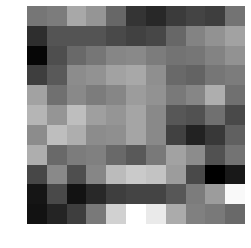

In [386]:
plt.axis('off')
if not str(type(texture_bubbly[5])) == "<class 'NoneType'>":
    plt.imshow(texture_bubbly[486], cmap=plt.cm.gray)
else:
    print(type(texture_bubbly[5]))

In [401]:
texture_bubbly_vector = texture_bubbly.reshape(texture_bubbly_vector.shape).astype('float64')
texture_stratified_vector = texture_stratified.reshape(texture_stratified_vector.shape).astype('float64')
texture_veined_vector = texture_veined.reshape(texture_veined_vector.shape).astype('float64')
print(texture_bubbly_vector.shape, texture_stratified_vector.shape, texture_veined_vector.shape)
texture_bubbly_vector.dtype, texture_stratified_vector.dtype, texture_veined_vector.dtype

(30000, 121) (30000, 121) (30000, 121)


(dtype('float64'), dtype('float64'), dtype('float64'))

In [387]:
texture_bubbly_center = my_k_means(texture_bubbly_vector,300)

0
1
2
3
4
5
6
7
8
9


In [403]:
texture_stratified_center = my_k_means(texture_stratified_vector,300,rseed=2019)

0
1
2
3
4
5
6
7
8
9


In [404]:
texture_veined_center = my_k_means(texture_veined_vector,300)

0
1
2
3
4
5
6
7
8
9


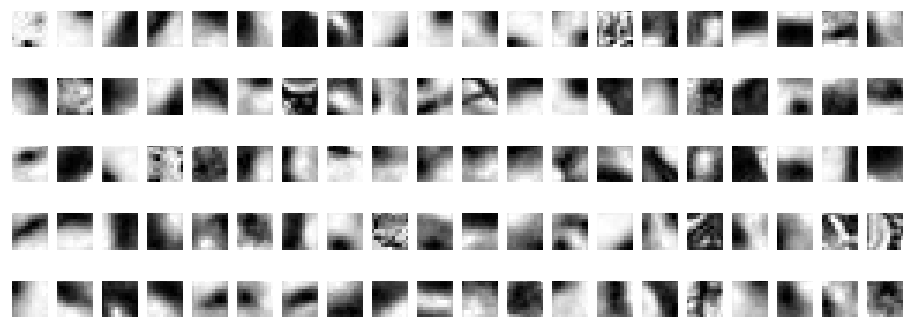

In [411]:
fig, ax = plt.subplots(5, 20, figsize = (16,6))
centers = texture_bubbly_center[0:100,:].reshape(100,11,11)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

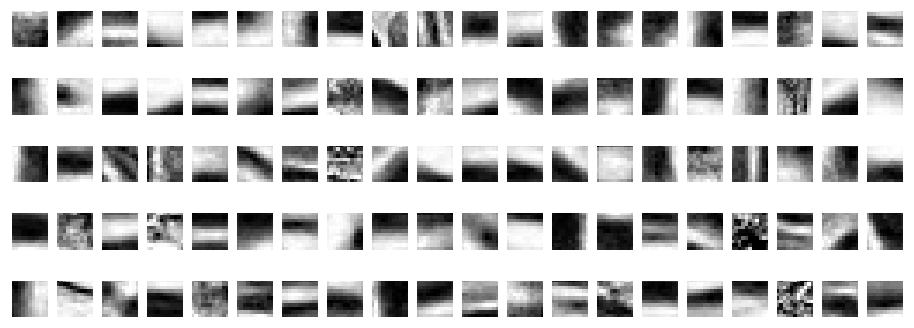

In [412]:
fig, ax = plt.subplots(5, 20, figsize = (16,6))
centers = texture_stratified_center[0:100,:].reshape(100,11,11)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

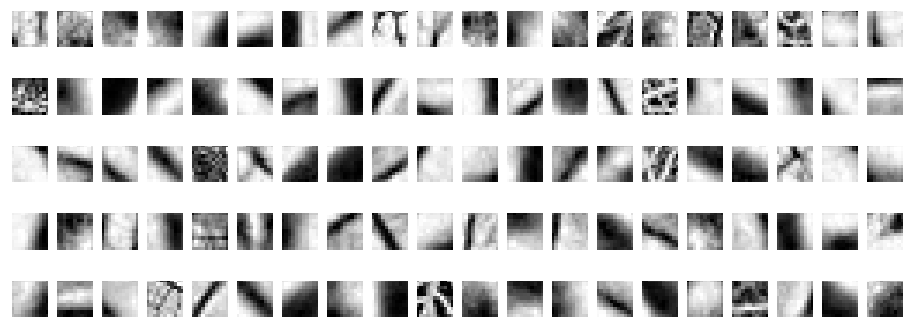

In [413]:
fig, ax = plt.subplots(5, 20, figsize = (16,6))
centers = texture_veined_center[0:100,:].reshape(100,11,11)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)